In [1]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

import sklearn
import scipy

import sys
import os
import pathlib
import itertools
import glob
import re
import datetime

from itertools import groupby
from operator import itemgetter

from sklearn.preprocessing import QuantileTransformer, StandardScaler

package_path = os.path.join(pathlib.Path.home(), "mkvchain")
sys.path.append(package_path)
from model import FeatureDependentMarkovChain

In [2]:
root = pathlib.Path.home()
pt1 = os.path.join(root, 'research', 'GADS_Processed', "trajectories_with_features")

def glob_re(pattern, strings):
    return list(filter(re.compile(pattern).match, strings))

filenames = glob_re(r"gen_\d+_type_100_dtgrp_1_rating_3_state_Texas_raw.csv", os.listdir(pt1))

In [3]:
len(filenames)

61

In [19]:


mylist = []
        
for f in filenames[::2]:
    # gen_id = int(re.findall(r"gen_(\d+)_.+", f)[0])

    data = pd.read_csv(os.path.join(pt1,f))
    data.set_index(pd.DatetimeIndex(data["x"]), inplace=True)
    data = data[~data.index.duplicated()]

    for c in ['y3', 'ERCOT', 'y4', 'Pcp', 'Tmax', 'Tmin', 'y6', 'y8', 'y7']:
        data = data[~data[c].isna()]

    if len(data) < 2:
        mylist.append([])
        continue

    mylist.append(data)

In [20]:
for j in mylist:
    try:
        print(np.nanmax(j["y6"]), np.nanmax(j["y7"]))
    except:
        print("No data")

999.0 306.0
1088.0 267.0
349.0 177.0
599.0 243.0
3878.0 3080.0
2453.0 2201.0
581.0 409.0
264.0 524.0
No data
No data
2486.0 3052.0
659.0 608.0
753.0 540.0
458.0 695.0
1301.0 460.0
2645.0 2438.0
234.0 462.0
No data
1202.0 1562.0
763.0 684.0
827.0 563.0
1226.0 583.0
2486.0 2519.0
694.0 749.0
No data
306.0 406.0
No data
672.0 245.0
662.0 168.0
2594.0 2132.0
3004.0 2930.0


In [14]:
filenames[::2][4]

'gen_2962_type_100_dtgrp_1_rating_3_state_Texas_raw.csv'

In [24]:
np.unique(mylist[4]["y6"])

array([  27.,   28.,   29., ..., 3876., 3877., 3878.], shape=(3822,))

In [29]:
df = mylist[4]

df[df["y2"] != 1]

,x,y1,y2,y3,ERCOT,y4,Pcp,Tmax,Tmin,y6,y7,y8
x,,,,,,,,,,,,
2013-07-05 18:00:00,2013-07-05T18:00:00.0,0.0,2.0,12240,57533.44741,186,3.10,92.7,69.9,47.0,20.0,7
2013-07-05 19:00:00,2013-07-05T19:00:00.0,0.0,2.0,12240,55830.96164,186,3.10,92.7,69.9,47.0,20.0,7
2013-07-05 20:00:00,2013-07-05T20:00:00.0,0.0,2.0,12240,53299.10277,186,3.10,92.7,69.9,47.0,20.0,7
2013-07-05 21:00:00,2013-07-05T21:00:00.0,0.0,2.0,12240,51007.54027,186,3.10,92.7,69.9,47.0,20.0,7
2013-07-09 08:00:00,2013-07-09T08:00:00.0,0.0,2.0,12243,38834.23220,190,3.10,92.7,69.9,50.0,23.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 01:00:00,2017-01-01T01:00:00.0,0.0,5.0,13515,29420.64000,1,2.28,63.0,38.6,1322.0,524.0,1
2017-01-01 02:00:00,2017-01-01T02:00:00.0,0.0,5.0,13515,28870.81000,1,2.28,63.0,38.6,1322.0,524.0,1
2017-01-01 03:00:00,2017-01-01T03:00:00.0,0.0,5.0,13515,28211.72000,1,2.28,63.0,38.6,1322.0,525.0,1


In [4]:
train_idx =  int(lengths.size * .8)
val_idx =  int(lengths.size * .9)

lengths_train = lengths[:train_idx]
lengths_val = lengths[train_idx:val_idx]
lengths_test = lengths[val_idx:]

states_train = states[:lengths_train.sum()]
states_val = states[lengths_train.sum():lengths_train.sum()+lengths_val.sum()]
states_test = states[lengths_train.sum()+lengths_val.sum():]

features_train = features[:lengths_train.sum()]
features_val = features[lengths_train.sum():lengths_train.sum()+lengths_val.sum()]
features_test = features[lengths_train.sum()+lengths_val.sum():]

In [5]:
features_train.shape, states_train.shape

((1825810, 9), (1825810,))

In [7]:

ss = StandardScaler()

features_train = ss.fit_transform(features_train)
features_val = ss.transform(features_val)
features_test = ss.transform(features_test)

In [6]:
n = 5
model1 = FeatureDependentMarkovChain(n, lam_frob=0.001, n_iter=1)
model1.fit(states_train, features_train*0, lengths_train, verbose=False)

predictions = model1.predict(features_val)
for i, j in itertools.product(range(4), range(4)):
    y = predictions[:, i, j]
    val = len(np.unique(y.round(decimals=3)))
    print(f"{i} -> {j} : {val}")

0 -> 0 : 1
0 -> 1 : 1
0 -> 2 : 1
0 -> 3 : 1
1 -> 0 : 1
1 -> 1 : 1
1 -> 2 : 1
1 -> 3 : 1
2 -> 0 : 1
2 -> 1 : 1
2 -> 2 : 1
2 -> 3 : 1
3 -> 0 : 1
3 -> 1 : 1
3 -> 2 : 1
3 -> 3 : 1


In [7]:
from copy import deepcopy
val2 = -np.inf
best_lam = None
model2 = None
for lam in np.logspace(-3,-1,10):
    model = FeatureDependentMarkovChain(n, lam_frob=lam,  n_iter=1)
    model.As = deepcopy(model1.As)
    model.bs = deepcopy(model1.bs)
    model.fit(states_train, features_train, lengths_train, verbose=False, warm_start=True)
    traini, vali= model.score(states_train, features_train, lengths_train, average=False), \
          model.score(states_val, features_val, lengths_val, average=False)
        #   model.score(states_test, features_test, lengths_test, average=False)
    if vali > val2:
        val2 = vali
        best_lam = lam
        model2 = model

In [8]:

model = FeatureDependentMarkovChain(n, lam_frob=best_lam, n_iter=1)
model.As = deepcopy(model1.As)
model.bs = deepcopy(model1.bs)
model.fit(states_train, features_train, lengths_train, verbose=False, warm_start=True)

predictions2 = model.predict(features_test)
for i, j in itertools.product(range(4), range(4)):
    y = predictions2[:, i, j]
    val = len(np.unique(y.round(decimals=3)))
    print(f"{i} -> {j} : {val}")

0 -> 0 : 15
0 -> 1 : 15
0 -> 2 : 2
0 -> 3 : 2
1 -> 0 : 17
1 -> 1 : 44
1 -> 2 : 28
1 -> 3 : 6
2 -> 0 : 5
2 -> 1 : 93
2 -> 2 : 98
2 -> 3 : 3
3 -> 0 : 22
3 -> 1 : 18
3 -> 2 : 5
3 -> 3 : 42


In [9]:
best_lam

np.float64(0.1)

In [10]:
import joblib

# save
joblib.dump(model, "model.pkl")

['model.pkl']

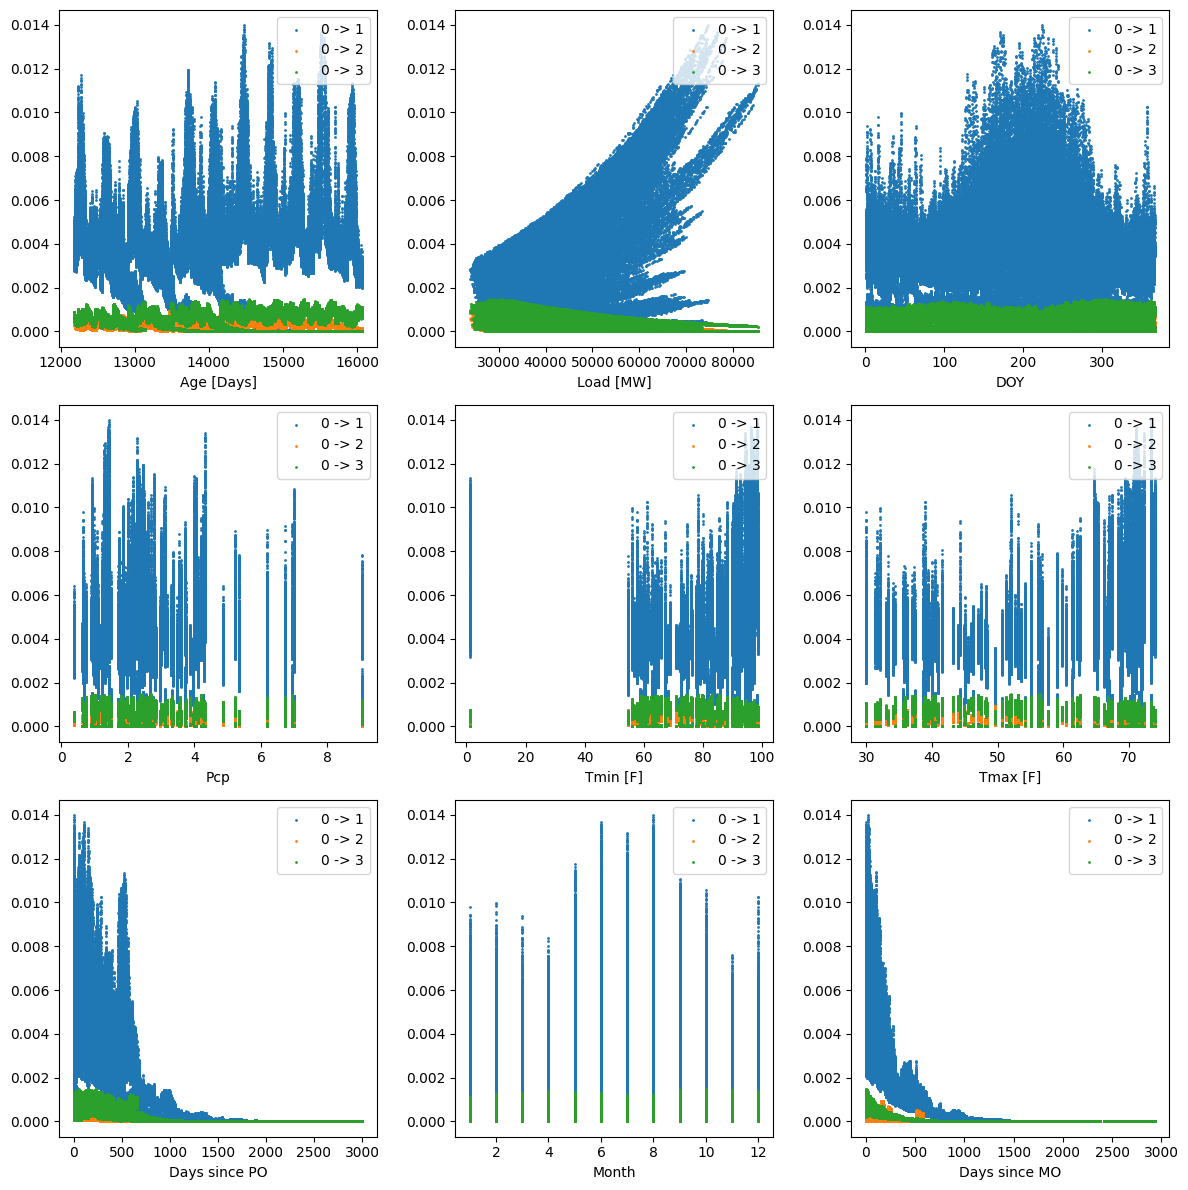

In [11]:
feature_names = ['Age [Days]', 'Load [MW]', 'DOY', 'Pcp', "Tmin [F]", "Tmax [F]", 'Days since PO', 'Month', 'Days since MO']
features_test2 = features[lengths_train.sum()+lengths_val.sum():]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

for i in range(9):

    if i//3 < 1:
        k = 0
        j = i
    elif i//3 < 2:
        k = 1
        j = np.mod(i, 3)
    else:
        k = 2
        j = np.mod(i, 3)

    f = features_test2[:, i]

    for m, n in itertools.product([0], range(1,4)):
    
        ax[k, j].scatter(f, predictions2[:, m, n], s=1, label=f"{m} -> {n}")
    
    ax[k, j].set_xlabel(feature_names[i])
    ax[k, j].legend(loc='upper right')
    # ax[i, j].set_yscale('log')

fig.tight_layout()

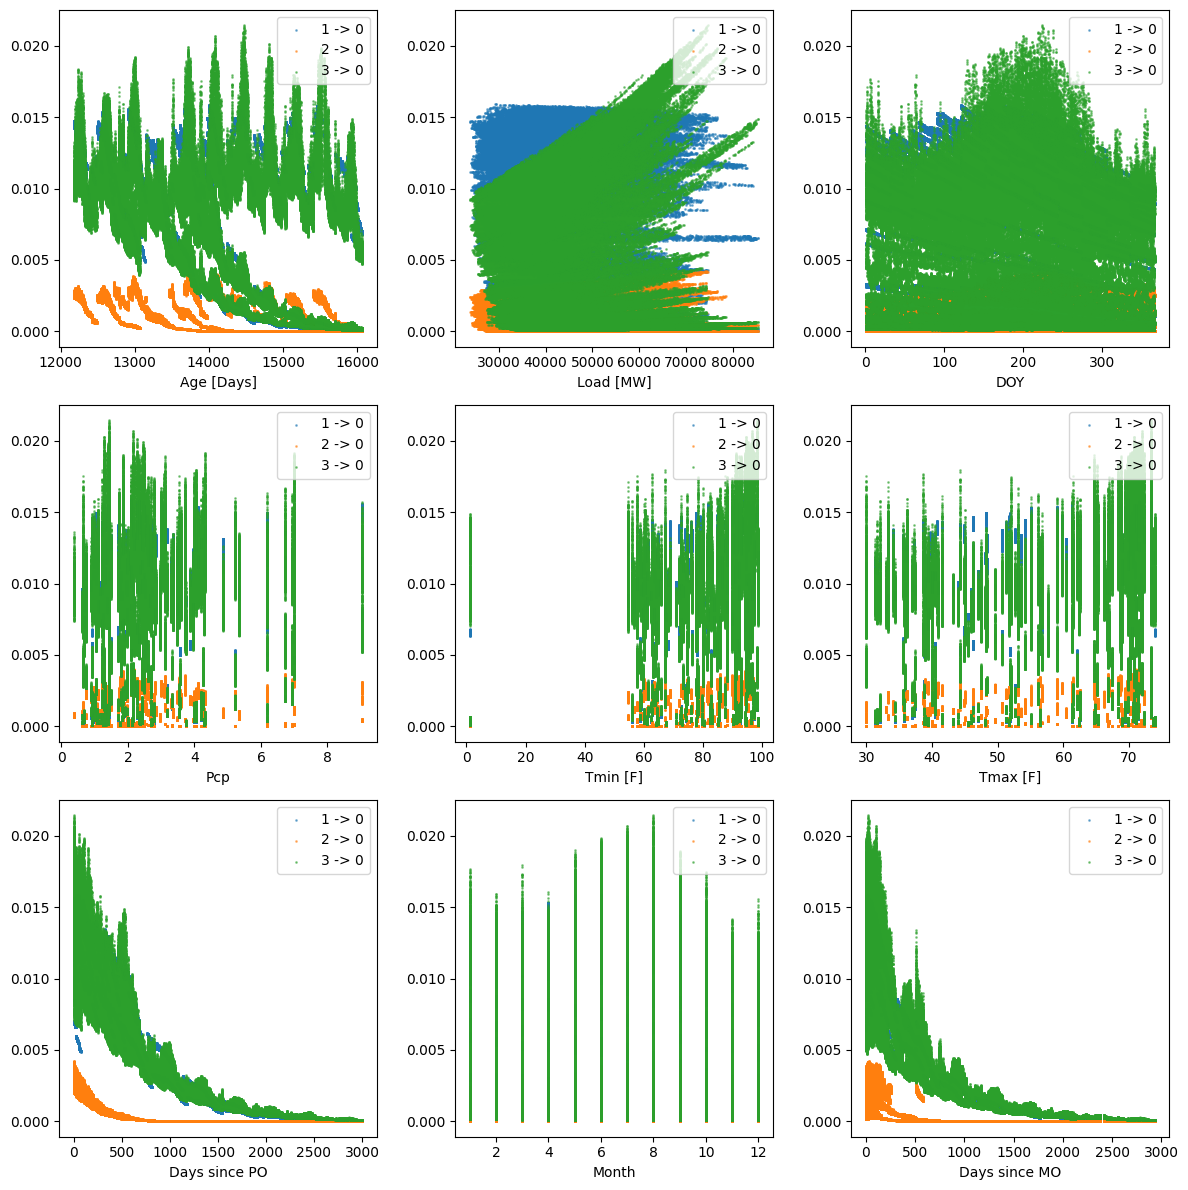

In [15]:
feature_names = ['Age [Days]', 'Load [MW]', 'DOY', 'Pcp', "Tmin [F]", "Tmax [F]", 'Days since PO', 'Month', 'Days since MO']
features_test2 = features[lengths_train.sum()+lengths_val.sum():]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

for i in range(9):

    if i//3 < 1:
        k = 0
        j = i
    elif i//3 < 2:
        k = 1
        j = np.mod(i, 3)
    else:
        k = 2
        j = np.mod(i, 3)

    f = features_test2[:, i]

    for m, n in itertools.product(range(1,4), [0] ):
    
        ax[k, j].scatter(f, predictions2[:, m, n], s=1, label=f"{m} -> {n}", alpha=0.5)
    
    ax[k, j].set_xlabel(feature_names[i])
    ax[k, j].legend(loc='upper right')
    # ax[i, j].set_yscale('log')

fig.tight_layout()

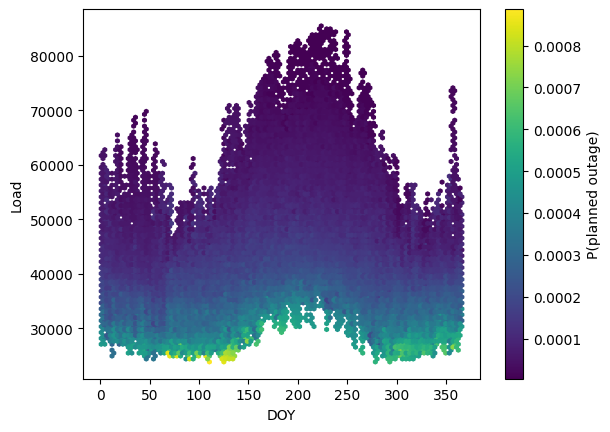

In [25]:
fig, ax = plt.subplots()

sm = ax.hexbin(features_test2[:, 2], features_test2[:, 1], C=predictions2[:, 0, 2])

ax.set_xlabel("DOY")
ax.set_ylabel("Load")
fig.colorbar(sm, label="P(planned outage)")

Text(0, 0.5, 'P(planned outage)')

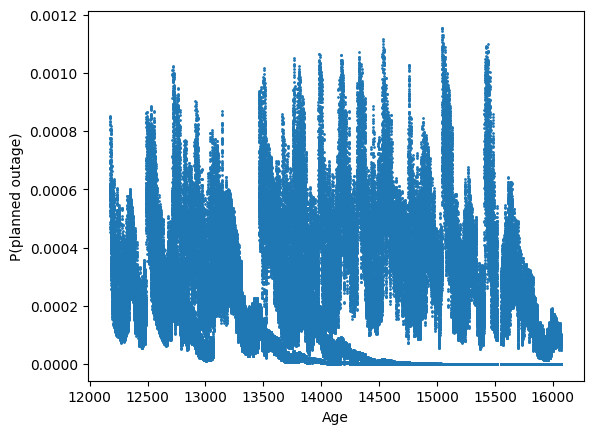

In [43]:
fig, ax = plt.subplots()

sm = ax.scatter(features_test2[:, 0], predictions2[:, 0, 2], s=1)

ax.set_xlabel("Age")
ax.set_ylabel("P(planned outage)")

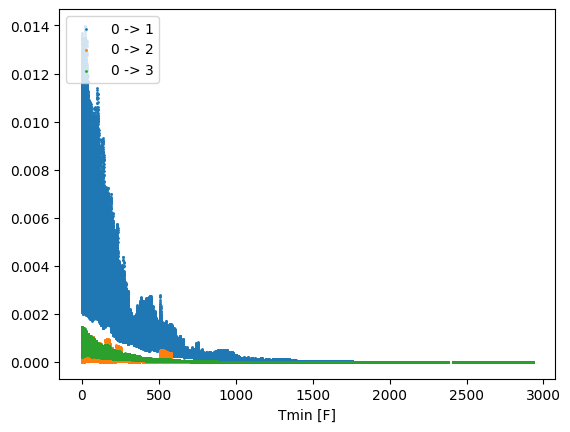

In [ ]:
fig, ax = plt.subplots()

f = features_test2[:, 8]

for m, n in itertools.product([0], range(1,4)):
    
    ax.scatter(f, predictions2[:, m, n], s=1, label=f"{m} -> {n}")

ax.set_xlabel("Tmin [F]")
ax.legend(loc="upper left")

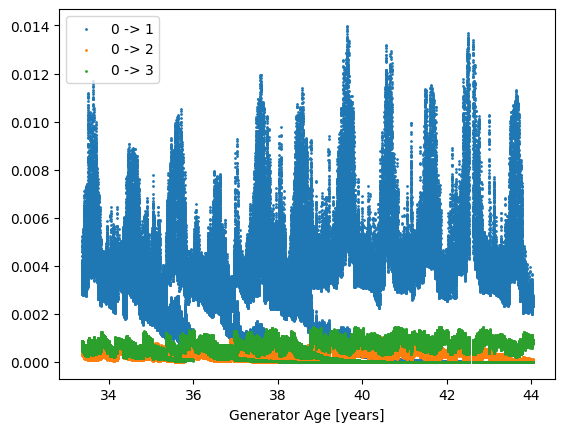

In [14]:
fig, ax = plt.subplots()

f = features_test2[:, 0]

for m, n in itertools.product([0], range(1,4)):
    
    ax.scatter(f/365, predictions2[:, m, n], s=1, label=f"{m} -> {n}")

ax.set_xlabel("Generator Age [years]")
ax.legend(loc="upper left")

In [ ]:
import joblib

# save
joblib.dump(model, "model.pkl")